In [39]:
import numpy as np
import pandas as pd
import json
import math
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
rest_reviews=pd.read_pickle('/Volumes/DrewM_External/DataScience/Incubator_Challenge/Yelp_data/yelp_dataset/restaurant_reviews')

In [4]:
business=pd.read_feather('/Volumes/DrewM_External/DataScience/Incubator_Challenge/Yelp_data/yelp_dataset/business')

In [5]:
restaurants=business[business['categories'].str.contains("Restaurants",na=False)]

In [6]:
unq_rest_ids=restaurants['business_id'].unique()

In [7]:
user_id_count=rest_reviews.user_id.value_counts().index.tolist()

In [8]:
test_reviews=rest_reviews[rest_reviews['user_id']==user_id_count[0]][0:100]

In [9]:
train_reviews=rest_reviews[rest_reviews['user_id']==user_id_count[0]][100:]

In [10]:
total_reviews=rest_reviews[rest_reviews['user_id']!=user_id_count[0]]

In [11]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df = 2, stop_words='english', use_idf=True)

In [12]:
X = vectorizer.fit_transform(train_reviews.text)

In [13]:
Y = vectorizer.get_feature_names()

In [14]:
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Review{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [15]:
train_df = pd.DataFrame(data=np.mean(X.toarray(),0), index=Y)

In [16]:
X2 = vectorizer.fit_transform(total_reviews.text[0:100000])

In [17]:
Y2 = vectorizer.get_feature_names()

In [18]:
total_df = pd.DataFrame(data=np.mean(X2.toarray(),0), index=Y2)

In [19]:
total_df_cut=total_df.reindex(Y,fill_value=0)

In [20]:
Prop_prob=(train_df/total_df_cut)

In [21]:
review_list = test_reviews.business_id.to_list()

In [22]:
reviews_business = rest_reviews[rest_reviews.business_id==review_list[0]]

In [23]:
reviews_business.stars.mean()

3.7058823529411766

In [24]:
X3 = vectorizer.fit_transform(reviews_business.text)

In [25]:
Y3 = vectorizer.get_feature_names()

In [26]:
business_df = wm2df(X3,Y3)

In [27]:
business_df=business_df.reindex(columns=Y,fill_value=0)

In [28]:
np.sum(np.multiply(reviews_business.stars.to_numpy(),business_df.sum(axis=1).to_numpy()))/np.sum(business_df.sum(axis=1))

3.755335730666529

In [84]:
mean_stars = np.zeros(len(review_list))
weighted_stars = np.zeros(len(review_list))
count = 0
for bus in review_list:
    reviews_business = rest_reviews[rest_reviews.business_id==bus]
    if reviews_business.shape[0] > 4:
        mean_stars[count] = reviews_business.stars.mean()
        X3 = vectorizer.fit_transform(reviews_business.text)
        Y3 = vectorizer.get_feature_names()
        business_df = wm2df(X3,Y3)
        business_df=business_df.reindex(columns=Y,fill_value=0)
        business_df=business_df.fillna(0)
        business_df=np.multiply(business_df,Prop_prob.transpose())
        weighted_stars[count] = np.sum(np.multiply(reviews_business.stars.to_numpy(),business_df.sum(axis=1).to_numpy()))/np.sum(business_df.sum(axis=1))
    else:
        mean_stars[count] = reviews_business.stars.mean()
        weighted_stars[count] = math.nan   
    count += 1

/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: inv

/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid valu

/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/andrewmccallister/anaconda/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid valu

In [58]:
weighted_stars2=weighted_stars[~np.isnan(weighted_stars)]

In [57]:
mean_stars2=mean_stars[~np.isnan(weighted_stars)]

In [46]:
real_stars=test_reviews.stars.to_numpy()

In [56]:
real_stars=real_stars[~np.isnan(weighted_stars)]

In [53]:
import matplotlib.pyplot as plt

In [85]:
np.sum(business_df.sum(axis=1))

465.3644538021477

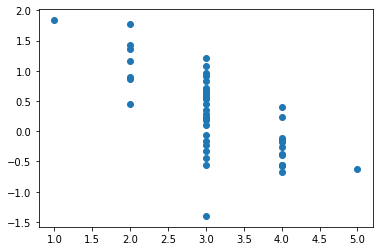

In [86]:
plt.scatter(real_stars,weighted_stars2-real_stars)

In [74]:
np.sum(np.isnan(Prop_prob))

0    0
dtype: int64

In [75]:
business_df

,00,000,05,10,100,10oz,11,11am,11pm,12,...,zushi,zzzzzz,zzzzzzzz,天下第一包,小籠包,燉湯,過橋米線,重慶小面,錦袍燒賣皇,飄香榴蓮酥
Review0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review3,0.0,0.0,0.0,0.326419,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review57,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review58,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review59,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
Review60,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [76]:
business_df=business_df.reindex(columns=Y,fill_value=0)

In [82]:
business_df.fillna(0)

,00,000,05,10,100,10oz,11,11am,11pm,12,...,zushi,zzzzzz,zzzzzzzz,天下第一包,小籠包,燉湯,過橋米線,重慶小面,錦袍燒賣皇,飄香榴蓮酥
Review0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review3,0.0,0.0,0.0,0.326419,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review57,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review58,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review59,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review60,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
Y[-8:]

['zzzzzzzz', '天下第一包', '小籠包', '燉湯', '過橋米線', '重慶小面', '錦袍燒賣皇', '飄香榴蓮酥']